In [1]:

import os
import pandas as pd
import numpy as np
file_path = "../data/"

data = pd.read_csv(file_path+"processed_data.csv")

In [2]:
data["tokens"] = data["tokens"].map(lambda x: str(x).split(","))


In [3]:
# Create a dictionary from ‘tokens’ containing the number of times a word appears in the training set.

from gensim import corpora

text_data = data["tokens"]
dictionary = corpora.Dictionary(text_data)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(text) for text in text_data]


In [4]:
from gensim.models import KeyedVectors
from gensim.models import word2vec
from gensim import corpora, models
from gensim.models import CoherenceModel
from gensim.models import LdaMulticore

topics = []
score = []


# Load pre-trained Word2Vec model for Tamil language
model_path = "/Users/samyuktha/FYP/data/cc.ta.300.vec.gz"
w2v_model = KeyedVectors.load_word2vec_format(model_path)



for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = data['tokens'], 
corpus=corpus, dictionary=dictionary, 
coherence='c_w2v',keyed_vectors=w2v_model)   
   topics.append(i)
   score.append(cm.get_coherence())

In [5]:
# print max score and corresponding topic number

print(max(score), topics[score.index(max(score))])


0.5079176 1


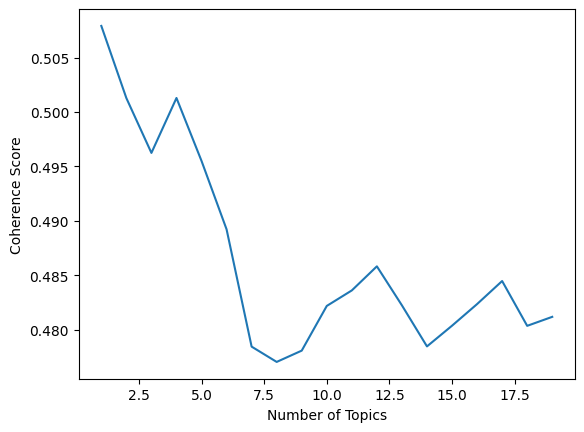

In [6]:
import matplotlib.pyplot as plt
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [8]:
import pyLDAvis.gensim_models
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()

lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(lda_viz, 'lda.html')

/Users/samyuktha/opt/anaconda3/envs/ml/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
